<a href="https://colab.research.google.com/github/MukiiriKoome/M-PESA-Transactions-Data-Science-Machine-Learning-Project/blob/main/mpesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# load the dataset

import xml.etree.ElementTree as ET

# Replace with your actual file path
xml_path = '/content/drive/MyDrive/sms-20250808170053.xml'

tree = ET.parse(xml_path)
root = tree.getroot()

# count number of SMS entries
print(len(root.findall('sms')))

1655


In [3]:
# print(root.findall('sms'))
print(tree)

In [4]:
import pandas as pd
mpesa_msgs = []
for sms in root.findall('sms'):
  body = sms.attrib['body']
  # extract only mpesa messages
  if 'M-PESA' in body:
    mpesa_msgs.append({
        'address':sms.attrib['address'],
        'date':sms.attrib['readable_date'],
        'body':body
    })

df = pd.DataFrame(mpesa_msgs)
df.head()

,address,date,body
0,MPESA,"Jan 16, 2025 15:14:18",TAG9EE4UZH Confirmed. Ksh40.00 sent to LOISE ...
1,MPESA,"Jan 16, 2025 21:58:29",TAG2GE8W5M Confirmed. Ksh100.00 sent to MOHAME...
2,MPESA,"Jan 16, 2025 22:04:23",TAG8GEYN7Y Confirmed. Ksh45.00 sent to ANTONY ...
3,MPESA,"Jan 17, 2025 09:49:20",TAH4HDFH0C Confirmed.You have received Ksh700....
4,MPESA,"Jan 17, 2025 11:01:02",TAH6HN0LI2 Confirmed. Ksh20.00 sent to JAMII T...


In [5]:
df.shape

(1026, 3)

In [6]:
df.tail()

,address,date,body
1021,MPESA,"Aug 8, 2025 12:13:18",TH88FVQ7YK Confirmed. Fuliza M-PESA amount is ...
1022,MPESA,"Aug 8, 2025 14:59:34",TH85GPQ3N7 Confirmed. Ksh10.00 paid to ROSWAMS...
1023,MPESA,"Aug 8, 2025 14:59:36",TH85GPQ3N7 Confirmed. Fuliza M-PESA amount is ...
1024,MPESA,"Aug 8, 2025 15:36:22",TH89GWB3C5 Confirmed.You have received Ksh10.0...
1025,MPESA,"Aug 8, 2025 15:36:33",TH89GWB4UL\n Confirmed. Ksh 10.00 from your M-...


In [7]:
# Check if a series contains categorical values
is_categorical = pd.api.types.is_categorical_dtype(df['address'])
print(f'is_categorical: {is_categorical}')

is_categorical: False


/tmp/ipython-input-795348473.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical = pd.api.types.is_categorical_dtype(df['address'])


In [8]:
# Convert the column to categorical values for ease of cleaning
df['address'] = df['address'].astype('category')

In [9]:
# Recheck again if it is categorical
is_categorical = pd.api.types.is_categorical_dtype(df['address'])
print(f'is_categorical: {is_categorical}')

is_categorical: True


/tmp/ipython-input-3682629352.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical = pd.api.types.is_categorical_dtype(df['address'])


In [10]:
df.dtypes

,0
address,category
date,object
body,object


In [11]:
# get the dataframe of mpesa address only
df_mpesa = df[df['address'] == 'MPESA']

In [12]:
df_mpesa.head()

,address,date,body
0,MPESA,"Jan 16, 2025 15:14:18",TAG9EE4UZH Confirmed. Ksh40.00 sent to LOISE ...
1,MPESA,"Jan 16, 2025 21:58:29",TAG2GE8W5M Confirmed. Ksh100.00 sent to MOHAME...
2,MPESA,"Jan 16, 2025 22:04:23",TAG8GEYN7Y Confirmed. Ksh45.00 sent to ANTONY ...
3,MPESA,"Jan 17, 2025 09:49:20",TAH4HDFH0C Confirmed.You have received Ksh700....
4,MPESA,"Jan 17, 2025 11:01:02",TAH6HN0LI2 Confirmed. Ksh20.00 sent to JAMII T...


In [13]:
df_mpesa.shape

(921, 3)

In [14]:
df_mpesa.reset_index(drop=True, inplace=True)

In [15]:
df_mpesa.tail()

,address,date,body
916,MPESA,"Aug 8, 2025 12:13:18",TH88FVQ7YK Confirmed. Fuliza M-PESA amount is ...
917,MPESA,"Aug 8, 2025 14:59:34",TH85GPQ3N7 Confirmed. Ksh10.00 paid to ROSWAMS...
918,MPESA,"Aug 8, 2025 14:59:36",TH85GPQ3N7 Confirmed. Fuliza M-PESA amount is ...
919,MPESA,"Aug 8, 2025 15:36:22",TH89GWB3C5 Confirmed.You have received Ksh10.0...
920,MPESA,"Aug 8, 2025 15:36:33",TH89GWB4UL\n Confirmed. Ksh 10.00 from your M-...


# **DATA CLEANING**

In [16]:
df_mpesa['date'] = pd.to_datetime(df_mpesa['date'], errors='coerce')

/tmp/ipython-input-1758266970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mpesa['date'] = pd.to_datetime(df_mpesa['date'], errors='coerce')


In [17]:
df_mpesa['date'].dtypes

dtype('<M8[ns]')

In [18]:
df_mpesa['date'].head()

,date
0,2025-01-16 15:14:18
1,2025-01-16 21:58:29
2,2025-01-16 22:04:23
3,2025-01-17 09:49:20
4,2025-01-17 11:01:02


In [19]:
df_mpesa['date'].isna().value_counts()

,count
date,
False,921


We can see that all our dates are in the correct format even after converting the datatypoe and coercing the errors anticipating any date that wasn't in the correct format

In [20]:
df_mpesa['body'].head()

,body
0,TAG9EE4UZH Confirmed. Ksh40.00 sent to LOISE ...
1,TAG2GE8W5M Confirmed. Ksh100.00 sent to MOHAME...
2,TAG8GEYN7Y Confirmed. Ksh45.00 sent to ANTONY ...
3,TAH4HDFH0C Confirmed.You have received Ksh700....
4,TAH6HN0LI2 Confirmed. Ksh20.00 sent to JAMII T...


In [21]:
pd.set_option('display.max_colwidth', None)

In [22]:
df_mpesa['body'].head()

,body
0,"TAG9EE4UZH Confirmed. Ksh40.00 sent to LOISE MUTIE 0717061402 on 16/1/25 at 3:14 PM. New M-PESA balance is Ksh335.46. Transaction cost, Ksh0.00. Amount you can transact within the day is 499,715.00. Thank you for being our valued customer, we appreciate you."
1,"TAG2GE8W5M Confirmed. Ksh100.00 sent to MOHAMED YUSUF 0707478287 on 16/1/25 at 9:58 PM. New M-PESA balance is Ksh235.46. Transaction cost, Ksh0.00. Amount you can transact within the day is 499,615.00. Thank you for being our valued customer, we appreciate you."
2,"TAG8GEYN7Y Confirmed. Ksh45.00 sent to ANTONY GICHUKI 0740459672 on 16/1/25 at 10:04 PM. New M-PESA balance is Ksh190.46. Transaction cost, Ksh0.00. Amount you can transact within the day is 499,570.00. Thank you for being our valued customer, we appreciate you."
3,TAH4HDFH0C Confirmed.You have received Ksh700.00 from HILDA WAMBUI 0707803640 on 17/1/25 at 9:49 AM New M-PESA balance is Ksh890.46. Sign up for Lipa Na M-PESA Till online https://m-pesaforbusiness.co.ke
4,"TAH6HN0LI2 Confirmed. Ksh20.00 sent to JAMII TELECOMMUNICATIONS LTD for account 254747712682-D3 on 17/1/25 at 11:00 AM New M-PESA balance is Ksh868.46. Transaction cost, Ksh2.00.Amount you can transact within the day is 499,980.00. Download new M-PESA app on http://bit.ly/mpesappsm & get 500MB FREE data."


In [23]:
df_mpesa['body'].sample(5)

,body
82,"TAM73HH3XJ Confirmed. Ksh25.00 sent to Equity Paybill Account for account 226824 on 22/1/25 at 10:57 AM New M-PESA balance is Ksh0.00. Transaction cost, Ksh0.00.Amount you can transact within the day is 499,975.00. Download new M-PESA app on http://bit.ly/mpesappsm & get 500MB FREE data."
401,TBM21CN7RW Confirmed.You have received Ksh100.00 from HILDA WAMBUI 0707803640 on 22/2/25 at 1:52 PM New M-PESA balance is Ksh100.00. Sign up for Lipa Na M-PESA Till online https://m-pesaforbusiness.co.ke
97,TAM85N7P9O Confirmed.You have received Ksh100.00 from KCB 1 501901 on 22/1/25 at 7:27 PM New M-PESA balance is Ksh111.45. Separate personal and business funds through Pochi la Biashara on *334#.
326,"TBH8DYG26W Confirmed. Ksh100.00 sent to ANTONY GICHUKI 0740459672 on 17/2/25 at 12:53 PM. New M-PESA balance is Ksh197.69. Transaction cost, Ksh0.00. Amount you can transact within the day is 499,900.00. Thank you for being our valued customer, we appreciate you."
612,"TCI35FRESJ Confirmed. You have received Ksh1,581.00 from IM BANK LIMITED- APP on 18/3/25 at 10:13 AM. New M-PESA balance is Ksh1,692.87. Buy goods with M-PESA."


We can see the example of fuliza transactions from the above sample. fuliza is an overdraft and will be a duplicate transaction since the message comes twice, one from the actual transaction (send or receive) and for fuliza,either fuliza was paid by money received or more credit from the money sent.

In [24]:
# A regex function to extract the sent and received transactions
import re

def extract_body(msg):
  transactions_data = {}
  # Match received amount
  received = re.search(r'received\s+Ksh([\d,]+\.\d{2})', msg)
  if received:
    transactions_data['type'] = 'Received'
    transactions_data['amount'] = float(received.group(1).replace(',',''))

    # Match sent to send money
  sent_pochi = re.search(r'Confirmed\.\s+Ksh([\d,]+\.\d{2})\s+sent', msg)
  if sent_pochi:
    transactions_data['type'] = 'Sent'
    transactions_data['amount'] = float(sent_pochi.group(1).replace(',',''))

    # Match sent to buy goods till number
  sent_till = re.search(r'Confirmed\.\s+Ksh([\d,]+\.\d{2})\s+paid', msg)
  if sent_till:
    transactions_data['type'] = 'Sent'
    transactions_data['amount'] = float(sent_till.group(1).replace(',',''))
  return transactions_data

In [25]:
# Apply the function to the body column
body_dict = df_mpesa['body'].apply(extract_body)
# We get a dictionary that we're going to convert to a dataframe and add it back to a copy of the original dataframe


In [26]:
print(body_dict)

0           {'type': 'Sent', 'amount': 40.0}
1          {'type': 'Sent', 'amount': 100.0}
2           {'type': 'Sent', 'amount': 45.0}
3      {'type': 'Received', 'amount': 700.0}
4           {'type': 'Sent', 'amount': 20.0}
                       ...                  
916                                       {}
917         {'type': 'Sent', 'amount': 10.0}
918                                       {}
919     {'type': 'Received', 'amount': 10.0}
920                                       {}
Name: body, Length: 921, dtype: object


In [27]:
df_mpesa.sample(10)

,address,date,body
683,MPESA,2025-07-19 11:37:06,"TGJ9LWEFGB Confirmed. Ksh50.00 sent to ANTHONY NJIRU on 19/7/25 at 11:21 AM. New M-PESA balance is Ksh0.00. Transaction cost, Ksh0.00. Amount you can transact within the day is 499,950.00. Sign up for Lipa Na M-PESA Till online https://m-pesaforbusiness.co.ke"
527,MPESA,2025-03-07 13:17:58,TC77QFYA1B\n Confirmed. Ksh 1.00 from your M-PESA has been used to partially pay your outstanding Fuliza M-PESA. Your available Fuliza M-PESA limit is Ksh 81.36. M-PESA balance is Ksh0.00.
830,MPESA,2025-08-01 19:01:20,"TH15H82C7J Confirmed.You have received Ksh50.00 from HILDA WAMBUI 0707803640 on 1/8/25 at 7:01 PM New M-PESA balance is Ksh50.00. Earn interest daily on Ziidi MMF,Dial *334#"
785,MPESA,2025-07-28 20:58:40,"TGS4WVAM5O Confirmed.You have received Ksh30.00 from HILDA WAMBUI 0707803640 on 28/7/25 at 8:58 PM New M-PESA balance is Ksh30.00. Earn interest daily on Ziidi MMF,Dial *334#"
725,MPESA,2025-07-24 14:11:52,"TGO6B6DAFQ Confirmed. Ksh50.00 sent to cecilia njogu on 24/7/25 at 2:11 PM. New M-PESA balance is Ksh0.00. Transaction cost, Ksh0.00. Amount you can transact within the day is 499,880.00. Sign up for Lipa Na M-PESA Till online https://m-pesaforbusiness.co.ke"
484,MPESA,2025-03-03 16:58:49,TC388DQSRQ Confirmed.Ksh150.00 transferred from M-Shwari account on 3/3/25 at 4:58 PM. M-Shwari balance is Ksh151.51 .M-PESA balance is Ksh168.26 .Transaction cost Ksh.0.00
55,MPESA,2025-01-21 07:48:53,"TAL5XNCFIJ Confirmed. Fuliza M-PESA amount is Ksh 30.00. Interest charged Ksh 0.30. Total Fuliza M-PESA outstanding amount is Ksh 41.76 due on 20/02/25. To check daily charges, Dial *234*0#OK Select Query Charges"
617,MPESA,2025-03-18 11:59:12,"TCI15UFQT1 Confirmed. Ksh30.00 sent to Equity Paybill Account for account 0701946625 on 18/3/25 at 11:59 AM New M-PESA balance is Ksh802.95. Transaction cost, Ksh0.00.Amount you can transact within the day is 498,805.08. Save frequent paybills for quick payment on M-PESA app https://bit.ly/mpesalnk"
589,MPESA,2025-03-14 08:38:44,"TCE1M58X71 Confirmed. Ksh50.00 sent to ANTONY GICHUKI 0740459672 on 14/3/25 at 8:38 AM. New M-PESA balance is Ksh0.00. Transaction cost, Ksh0.00. Amount you can transact within the day is 499,950.00. To schedule payments on MPESA Ratiba today, dial *334#"
777,MPESA,2025-07-28 13:59:14,"TGS1UFVPJ1 Confirmed. Fuliza M-PESA amount is Ksh 30.00. Access Fee charged Ksh 0.30. Total Fuliza M-PESA outstanding amount is Ksh 101.10 due on 26/08/25. To check daily charges, Dial *334#OK Select Fuliza M-PESA to Query Charges."


In [29]:
print(body_dict[785])

{'type': 'Received', 'amount': 30.0}


In [43]:
body_df = pd.DataFrame(body_dict.to_list())

In [44]:
body_df.head()

,type,amount
0,Sent,40.0
1,Sent,100.0
2,Sent,45.0
3,Received,700.0
4,Sent,20.0


In [46]:
df_mpesa_cleaned = df_mpesa.copy()

In [48]:
df_mpesa_cleaned.drop(labels='body', axis=1)

,address,date
0,MPESA,2025-01-16 15:14:18
1,MPESA,2025-01-16 21:58:29
2,MPESA,2025-01-16 22:04:23
3,MPESA,2025-01-17 09:49:20
4,MPESA,2025-01-17 11:01:02
...,...,...
916,MPESA,2025-08-08 12:13:18
917,MPESA,2025-08-08 14:59:34
918,MPESA,2025-08-08 14:59:36
919,MPESA,2025-08-08 15:36:22


In [49]:
df_mpesa_cleaned = pd.concat([df_mpesa_cleaned, body_df], axis=1)

In [51]:
df_mpesa_cleaned = df_mpesa_cleaned.drop(labels='body', axis=1)
df_mpesa_cleaned.head()

,address,date,type,amount
0,MPESA,2025-01-16 15:14:18,Sent,40.0
1,MPESA,2025-01-16 21:58:29,Sent,100.0
2,MPESA,2025-01-16 22:04:23,Sent,45.0
3,MPESA,2025-01-17 09:49:20,Received,700.0
4,MPESA,2025-01-17 11:01:02,Sent,20.0


In [67]:
df_mpesa_cleaned=df_mpesa_cleaned.dropna(axis=0)

In [69]:
df_mpesa_cleaned.shape

(597, 4)

In [75]:
df_mpesa_cleaned['type'] = df_mpesa_cleaned['type'].astype('category')

/tmp/ipython-input-4161415578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mpesa_cleaned['type'] = df_mpesa_cleaned['type'].astype('category')


In [76]:
df_mpesa_cleaned.dtypes

,0
address,category
date,datetime64[ns]
type,category
amount,float64


# **Exploratory Data Analytics**

In [77]:
df_mpesa_cleaned['type'].value_counts()

,count
type,
Sent,407
Received,190


<Axes: xlabel='amount', ylabel='date'>

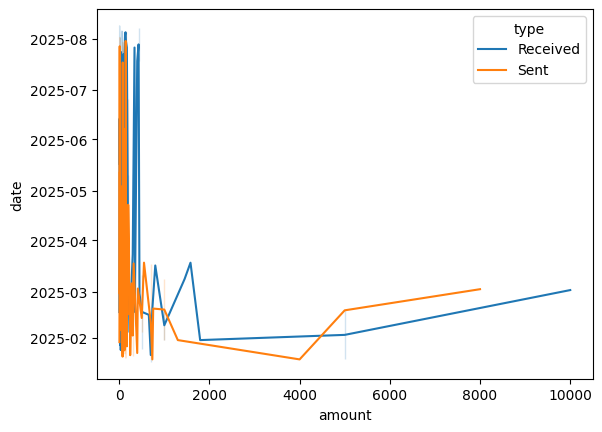

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data=df_mpesa_cleaned,
    x='amount',
    y='date',
    hue='type'
)

Text(0.5, 1.0, 'Scatter plot of the dates against amount')

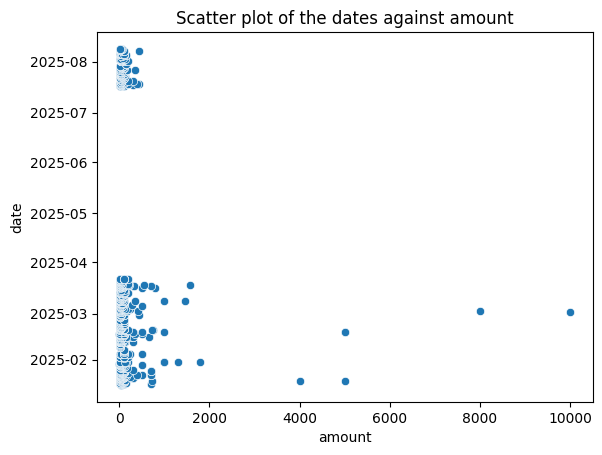

In [85]:
sns.scatterplot(data=df_mpesa_cleaned, x='amount', y='date')
plt.title('Scatter plot of the dates against amount')

Unfortunately, i lost my transactions from April - July as shown in the clusters in the scatter plot
So we're goingto have to work with the transactions from january to mach to avoid the outliers and make an assumption of that as a sample for the dataset.